In [64]:
import cf
import numpy as np
import netCDF4 as nc
import glob
import pylab as plt

### Set file paths

In [4]:
path = '/scratch/ptg21/netscratch/UM_data/u-bo797'
all_files = glob.glob(path + '/*.pp')

['/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20161201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20171201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20181201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20191201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20201201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20211201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20221201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20231201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20241201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20251201.pp', '/scratch/ptg21/netscratch/UM_data/u-bo797/bo797a.py20261201.pp']


### Read in all fields

In [5]:
all_fields = cf.read(all_files)

In [6]:
print(all_fields)

[<CF Field: long_name=CH4 MASS MIXING RATIO AFTER TSTEP(atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(192)) 1>,
 <CF Field: long_name=OH MASS MIXING RATIO AFTER TIMESTEP(atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(192)) 1>,
 <CF Field: long_name=CH4 MASS MIXING RATIO AFTER TSTEP(atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(192)) 1>,
 <CF Field: long_name=OH MASS MIXING RATIO AFTER TIMESTEP(atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(192)) 1>,
 <CF Field: long_name=CH4 MASS MIXING RATIO AFTER TSTEP(atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(192)) 1>,
 <CF Field: long_name=OH MASS MIXING RATIO AFTER TIMESTEP(atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(192)) 1>,
 <CF Field: long_name=CH4 MASS MIXING RATIO AFTER TSTEP(atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(192)) 1>,
 <CF Field: long_name=OH MASS MIXING RATIO AFTER TIMESTEP(atmosphere_h

### Group by year

In [10]:
merged = cf.aggregate(all_fields, relaxed_identities=True)

In [88]:
print(merged[0])

Field: long_name=CH4 MASS MIXING RATIO AFTER TSTEP (ncvar%UM_m01s34i009_vn1102)
-------------------------------------------------------------------------------
Data            : long_name=CH4 MASS MIXING RATIO AFTER TSTEP(time(11), atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(192)) 1
Cell methods    : time(11): mean
Dimension coords: time(11) = [2016-06-01 00:00:00, ..., 2026-06-01 00:00:00] 360_day
                : atmosphere_hybrid_height_coordinate(85) = [0.0002274019314295504, ..., 0.9664583007442351]
                : latitude(144) = [-89.375, ..., 89.375] degrees_north
                : longitude(192) = [0.9375, ..., 359.0625] degrees_east
Auxiliary coords: model_level_number(atmosphere_hybrid_height_coordinate(85)) = [1, ..., 85] 1
Coord references: standard_name:atmosphere_hybrid_height_coordinate
Domain ancils   : id%UM_atmosphere_hybrid_height_coordinate_a(atmosphere_hybrid_height_coordinate(85)) = [19.999998092651367, ..., 85000.0] m
                : i

### Write netcdf

In [18]:
write_path = '/home/znjs2/model_data'

In [91]:
cf.write(merged[0],f'{write_path}/ubo797_ch4_2016_2026.nc', fmt='NETCDF3_CLASSIC')

### Vertical profiles

In [34]:
ch4_all = merged[0]*28/16.*1e9
ch4_16_17 = ch4_all[:1,:,:,:]

In [90]:
lat = ch4_all.coordinate('latitude').get_data()
hyb_h = ch4_all.coordinate('atmosphere_hybrid_height_coordinate').get_data()
box_no = ch4_all.coordinate('model_level_number').get_data()
model_level = merged[5].get_data()
#lat.dump()
#model_level.dump()
box_no.dump()

Data.shape = (85,)
Data.first_datum = 1
Data.last_datum  = 85
Data.fill_value = None
Data.Units = <Units: 1>


In [101]:
height_m = merged[0].domain_ancillaries()
print(height_m)
height_dom_ancil = height_m.get_domain_ancillary('id%UM_atmosphere_hybrid_height_coordinate_a')
print(height_dom_ancil)

Constructs:
{'domainancillary0': <CF DomainAncillary: id%UM_atmosphere_hybrid_height_coordinate_a(85) m>,
 'domainancillary1': <CF DomainAncillary: id%UM_atmosphere_hybrid_height_coordinate_b(85) 1>}


AttributeError: 'Constructs' object has no attribute 'get_domain_ancillary'

In [39]:
print(lat)

[-89.375, ..., 89.375] degrees_north


In [35]:
#mean over lon and time
ch4_mean = ch4_16_17.collapse('mean', axes=['T','X'])

In [36]:
print(ch4_mean)

Field: long_name=CH4 MASS MIXING RATIO AFTER TSTEP (ncvar%UM_m01s34i009_vn1102)
-------------------------------------------------------------------------------
Data            : long_name=CH4 MASS MIXING RATIO AFTER TSTEP(time(1), atmosphere_hybrid_height_coordinate(85), latitude(144), longitude(1)) 1
Cell methods    : time(1): mean longitude(1): mean
Dimension coords: time(1) = [2016-06-01 00:00:00] 360_day
                : atmosphere_hybrid_height_coordinate(85) = [0.0002274019314295504, ..., 0.9664583007442351]
                : latitude(144) = [-89.375, ..., 89.375] degrees_north
                : longitude(1) = [180.0] degrees_east
Auxiliary coords: model_level_number(atmosphere_hybrid_height_coordinate(85)) = [1, ..., 85] 1
Coord references: standard_name:atmosphere_hybrid_height_coordinate
Domain ancils   : id%UM_atmosphere_hybrid_height_coordinate_a(atmosphere_hybrid_height_coordinate(85)) = [19.999998092651367, ..., 85000.0] m
                : id%UM_atmosphere_hybrid_height_

In [61]:
lat_bands_ch4 = np.empty((6,85))
base_em = np.zeros(6)

for i in range(-90,90,30):
    ind_range = np.where( (lat > i) & (lat<= i+30))[0]
    ind1 = ind_range[0]
    ind2 = ind_range[-1]
    lat_data = np.squeeze(np.array(ch4_mean.get_data()[:,:,ind1:ind2,:]))
    print(lat_data.shape)
    lat_mean = np.mean(lat_data, axis=1)
    ind3 = np.int((i+90)/30)
    base_em[ind3] = lat_mean[0]
    lat_bands_ch4[ind3,:] = lat_mean

print(lat_bands_ch4.shape)

(85, 23)
(85, 23)
(85, 23)
(85, 23)
(85, 23)
(85, 23)
(6, 85)


In [49]:
print(np.where( (lat > -90) & (lat<=-60))[0][0])

0


In [84]:
lat_bands_ch4_obs = np.load('/shared/netscratch/znjs2/atom_data_02_20/ch4_lat_binned.npy')
yvals = np.linspace(0,12000)
base_obs = lat_bands_ch4_obs[0,0]

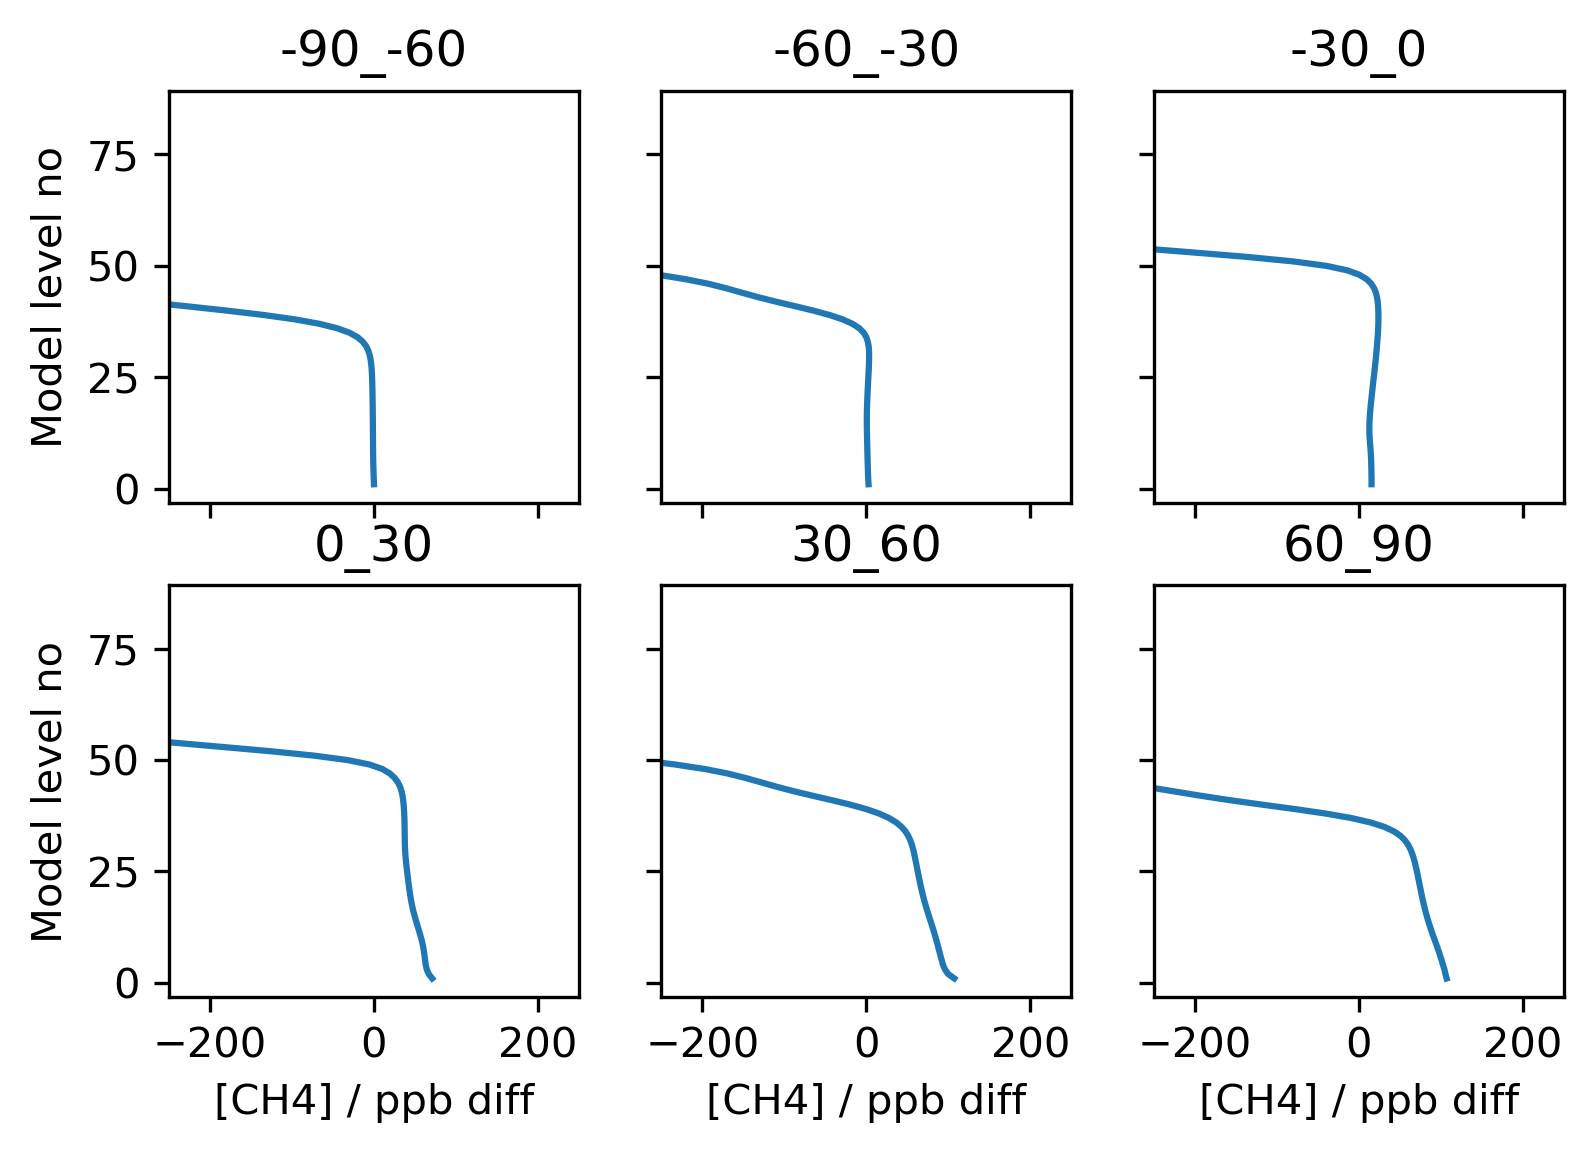

In [78]:
fig = plt.figure(dpi=300)
#ax = plt.axes()

plt_labels=["-90_-60","-60_-30","-30_0","0_30","30_60","60_90"]

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    ax.plot(lat_bands_ch4[i,:] - base_em[0], box_no, label=f'Emissions')
    #ax.plot(lat_bands_ch4_lbc[i,:] - base_lbc[0], alt_lbc/1000, label=f'LBC')
    #ax.plot(lat_bands_ch4_obs[i,:] - base_obs, yvals/1000, c ='k' ,label=f'Obs')
    #ax.set_ylim(0,0.5)
    ax.set_xlim(-250,250)
    plt.xlabel('[CH4] / ppb diff')
    plt.ylabel('Model level no')
    plt.title(f'{plt_labels[i]}')
    #if i == 5:
        #plt.legend(bbox_to_anchor=(1.05,1.4))

for ax in fig.get_axes():
    ax.label_outer()

#for legend for all lines in all subplots
#fig.legend(bbox_to_anchor=(1.1,1))

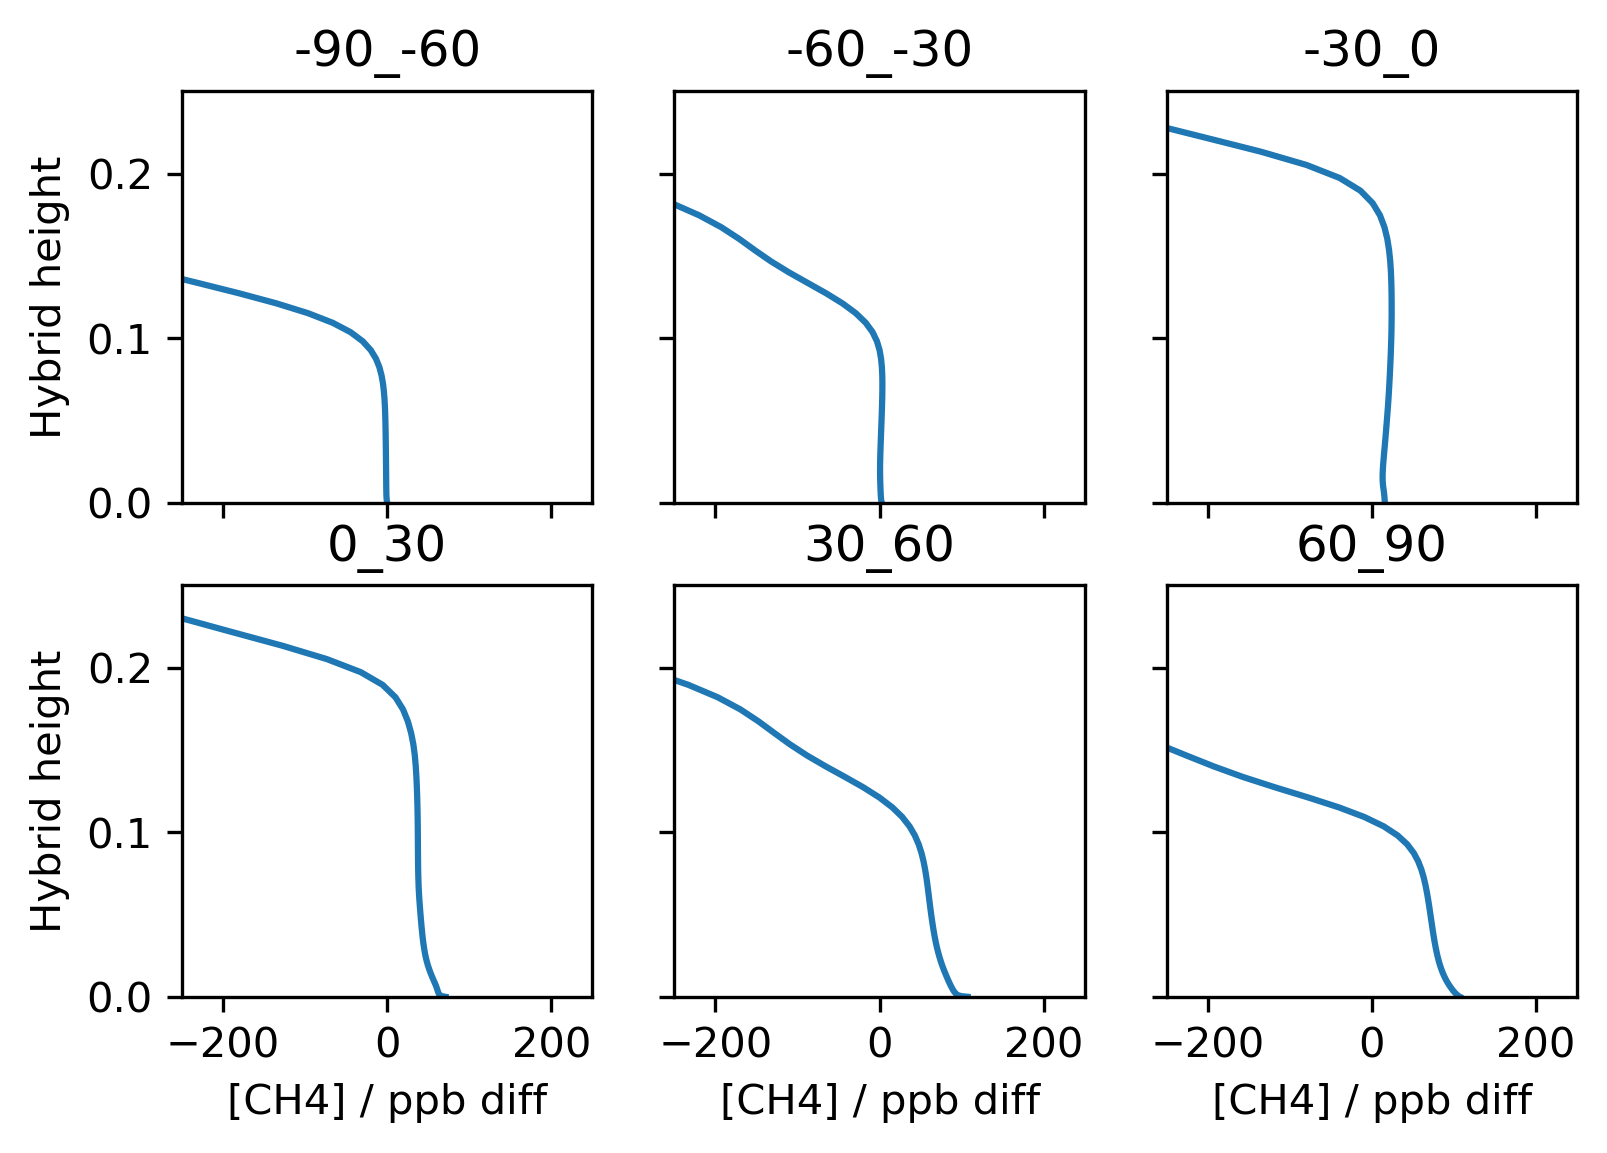

In [83]:
fig = plt.figure(dpi=300)
#ax = plt.axes()

plt_labels=["-90_-60","-60_-30","-30_0","0_30","30_60","60_90"]

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    ax.plot(lat_bands_ch4[i,:] - base_em[0], hyb_h, label=f'Emissions')
    #ax.plot(lat_bands_ch4_lbc[i,:] - base_lbc[0], alt_lbc/1000, label=f'LBC')
    #ax.plot(lat_bands_ch4_obs[i,:] - base_obs, yvals/1000, c ='k' ,label=f'Obs')
    ax.set_ylim(0,0.25)
    ax.set_xlim(-250,250)
    plt.xlabel('[CH4] / ppb diff')
    plt.ylabel('Hybrid height')
    plt.title(f'{plt_labels[i]}')
    #if i == 5:
        #plt.legend(bbox_to_anchor=(1.05,1.4))

for ax in fig.get_axes():
    ax.label_outer()

#for legend for all lines in all subplots
#fig.legend(bbox_to_anchor=(1.1,1))

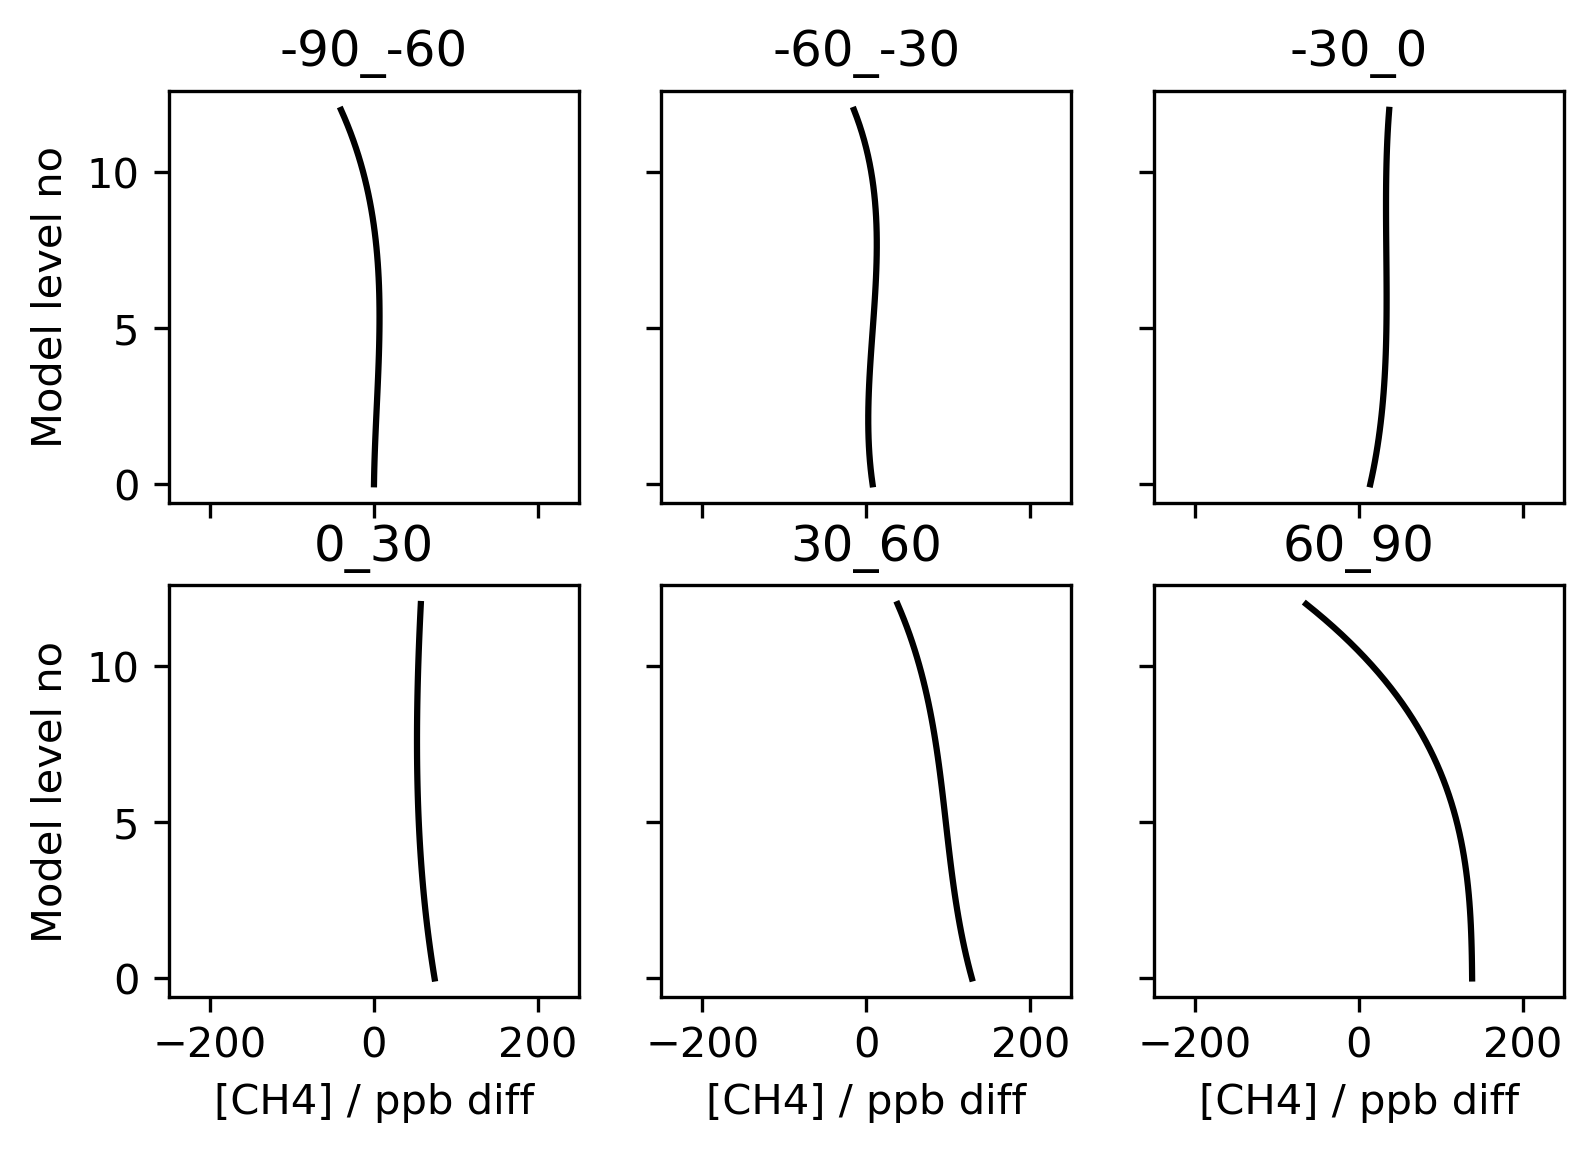

In [85]:
fig = plt.figure(dpi=300)
#ax = plt.axes()

plt_labels=["-90_-60","-60_-30","-30_0","0_30","30_60","60_90"]

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    #ax.plot(lat_bands_ch4[i,:] - base_em[0], box_no, label=f'Emissions')
    #ax.plot(lat_bands_ch4_lbc[i,:] - base_lbc[0], alt_lbc/1000, label=f'LBC')
    ax.plot(lat_bands_ch4_obs[i,:] - base_obs, yvals/1000, c ='k' ,label=f'Obs')
    #ax.set_ylim(0,0.5)
    ax.set_xlim(-250,250)
    plt.xlabel('[CH4] / ppb diff')
    plt.ylabel('Altitude / km')
    plt.title(f'{plt_labels[i]}')
    #if i == 5:
        #plt.legend(bbox_to_anchor=(1.05,1.4))

for ax in fig.get_axes():
    ax.label_outer()

#for legend for all lines in all subplots
#fig.legend(bbox_to_anchor=(1.1,1))